# AD HOC dataset all tests here

### Required imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVC
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score

from qiskit import BasicAer

from qiskit.ml.datasets import ad_hoc_data, sample_ad_hoc_data

from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name


seed = 10599
aqua_globals.random_seed = seed


/tmp/ipykernel_6575/871816487.py:17: DeprecationWarning: The variable qiskit.aqua.aqua_globals is deprecated. It was moved/refactored to qiskit.utils.algorithm_globals (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  aqua_globals.random_seed = seed


### Load adhoc dataset

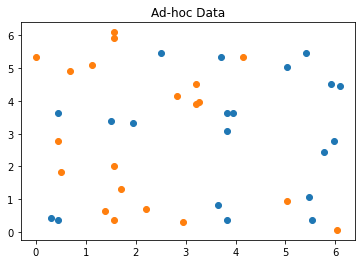

In [2]:
adhoc_dimension = 2

sample_total, training_input, test_input, class_labels = ad_hoc_data(
    training_size=20, 
    test_size=10, 
    n=adhoc_dimension, 
    gap=0.3, 
    plot_data=True
)

extra_test_data = sample_ad_hoc_data(sample_total, 10, n=adhoc_dimension)
datapoints, _ = split_dataset_to_data_and_labels(extra_test_data)

(train_features, train_labels), _ = split_dataset_to_data_and_labels(training_input)
(test_features, test_labels), _ = split_dataset_to_data_and_labels(test_input)

### Display data

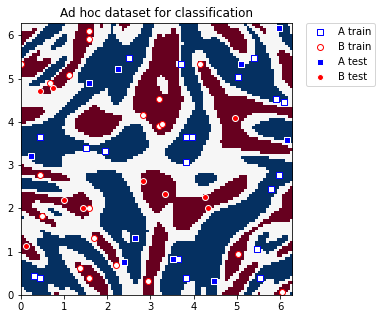

In [3]:
plt.figure(figsize=(5, 5))
plt.ylim(0, 2 * np.pi)
plt.xlim(0, 2 * np.pi)
plt.imshow(
    np.asmatrix(sample_total).T,
    interpolation="nearest",
    origin="lower",
    cmap="RdBu",
    extent=[0, 2 * np.pi, 0, 2 * np.pi],
)

plt.scatter(
    train_features[np.where(train_labels[:] == 0), 0],
    train_features[np.where(train_labels[:] == 0), 1],
    marker="s",
    facecolors="w",
    edgecolors="b",
    label="A train",
)
plt.scatter(
    train_features[np.where(train_labels[:] == 1), 0],
    train_features[np.where(train_labels[:] == 1), 1],
    marker="o",
    facecolors="w",
    edgecolors="r",
    label="B train",
)
plt.scatter(
    test_features[np.where(test_labels[:] == 0), 0],
    test_features[np.where(test_labels[:] == 0), 1],
    marker="s",
    facecolors="b",
    edgecolors="w",
    label="A test",
)
plt.scatter(
    test_features[np.where(test_labels[:] == 1), 0],
    test_features[np.where(test_labels[:] == 1), 1],
    marker="o",
    facecolors="r",
    edgecolors="w",
    label="B test",
)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.title("Ad hoc dataset for classification")

plt.show()

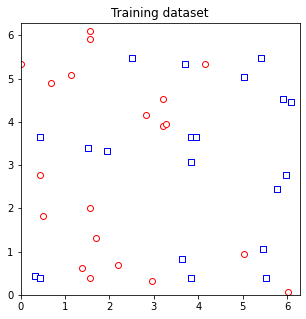

In [4]:
plt.figure(figsize=(5, 5))
plt.ylim(0, 2 * np.pi)
plt.xlim(0, 2 * np.pi)

plt.scatter(
    train_features[np.where(train_labels[:] == 0), 0],
    train_features[np.where(train_labels[:] == 0), 1],
    marker="s",
    facecolors="w",
    edgecolors="b",
    label="A train",
)
plt.scatter(
    train_features[np.where(train_labels[:] == 1), 0],
    train_features[np.where(train_labels[:] == 1), 1],
    marker="o",
    facecolors="w",
    edgecolors="r",
    label="B train",
)
plt.title("Training dataset")

plt.show()

#### Set backend

In [5]:
backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

#### Generate a quantum kernel using `PauliFeatureMap` linear

In [ ]:
from qiskit.circuit.library import PauliFeatureMap

adhoc_feature_map = PauliFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement='linear', insert_barriers=True)
adhoc_feature_map.decompose().draw(output='mpl', fold=-1)


#### Generate a quantum kernel using `PauliFeatureMap` circular

In [ ]:
from qiskit.circuit.library import PauliFeatureMap

adhoc_feature_map = PauliFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement='circular', insert_barriers=True)
adhoc_feature_map.decompose().draw(output='mpl', fold=-1)


#### Generate a quantum kernel using `PauliFeatureMap` full

In [ ]:
from qiskit.circuit.library import PauliFeatureMap

adhoc_feature_map = PauliFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement='full', insert_barriers=True)
adhoc_feature_map.decompose().draw(output='mpl', fold=-1)


#### Generate a quantum kernel using `ZFeatureMap` (No entanglement)

In [ ]:
from qiskit.circuit.library import ZFeatureMap

adhoc_feature_map = ZFeatureMap(feature_dimension=adhoc_dimension, reps=2, insert_barriers=True)
adhoc_feature_map.decompose().draw(output='mpl', fold=-1)


#### Generate a quantum kernel using `ZZFeatureMap`

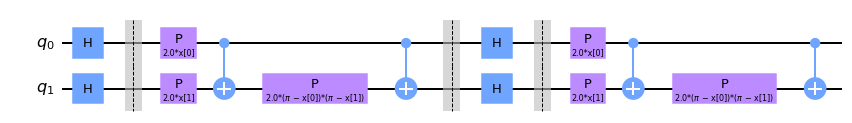

In [6]:
from qiskit.circuit.library import ZZFeatureMap

adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, insert_barriers=True)
adhoc_feature_map.decompose().draw(output='mpl', fold=-1)

## Run `QSVM` 

### Quantum kernel estimation

In [7]:
from qiskit.aqua.algorithms import QSVM

qsvm = QSVM(adhoc_feature_map, training_input, test_input, datapoints[0])

In [8]:
result = qsvm.run(quantum_instance)

print(f'Testing success ratio: {result["testing_accuracy"]}')
print()
print('Prediction from datapoints set:')
print(f'  ground truth: {map_label_to_class_name(datapoints[1], qsvm.label_to_class)}')
print(f'  prediction:   {result["predicted_classes"]}')
predicted_labels = result["predicted_labels"]
print(f'  success rate: {100*np.count_nonzero(predicted_labels == datapoints[1])/len(predicted_labels)}%')

Testing success ratio: 1.0

Prediction from datapoints set:
  ground truth: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
  prediction:   ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
  success rate: 100.0%


#### Show Quantum kernel

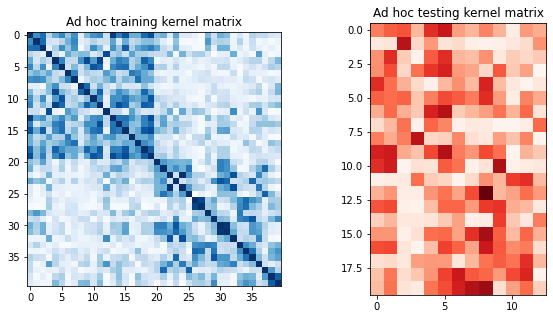

In [9]:
adhoc_matrix_train = result['kernel_matrix_training']
adhoc_matrix_test = result['kernel_matrix_testing']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(
    np.asmatrix(adhoc_matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("Ad hoc training kernel matrix")
axs[1].imshow(np.asmatrix(adhoc_matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Ad hoc testing kernel matrix")
plt.show()

### Variational Quantum Circuit (VQC)

In [10]:
from qiskit.aqua.algorithms import VQC
from qiskit.aqua.components.optimizers import SPSA
from qiskit.circuit.library import TwoLocal

optimizer = SPSA(maxiter=40, c0=4.0, skip_calibration=True)
var_form = TwoLocal(adhoc_dimension, ['ry', 'rz'], 'cz', reps=3)
vqc = VQC(optimizer, adhoc_feature_map, var_form, training_input, test_input, datapoints[0])

In [11]:
result = vqc.run(quantum_instance)

print(f'Testing success ratio: {result["testing_accuracy"]}')
print()
print('Prediction from datapoints set:')
print(f'  ground truth: {map_label_to_class_name(datapoints[1], vqc.label_to_class)}')
print(f'  prediction:   {result["predicted_classes"]}')
predicted_labels = result["predicted_labels"]
print(f'  success rate: {100*np.count_nonzero(predicted_labels == datapoints[1])/len(predicted_labels)}%')

Testing success ratio: 0.9

Prediction from datapoints set:
  ground truth: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
  prediction:   ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
  success rate: 100.0%


## Compare with classical SVM

Testing success ratio: 0.65

Prediction from datapoints set:
  ground truth: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
  prediction:   ['B', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'B', 'A']
  success rate: 55.0%


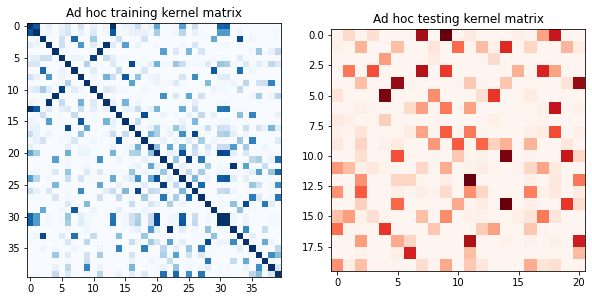

In [4]:
from qiskit.aqua.algorithms import SklearnSVM

sklearnsvm = SklearnSVM(training_input, test_input, datapoints[0])
result = sklearnsvm.run()

print(f'Testing success ratio: {result["testing_accuracy"]}')
print()
print('Prediction from datapoints set:')
print(f'  ground truth: {map_label_to_class_name(datapoints[1], sklearnsvm.label_to_class)}')
print(f'  prediction:   {result["predicted_classes"]}')
predicted_labels = result["predicted_labels"]
print(f'  success rate: {100*np.count_nonzero(predicted_labels == datapoints[1])/len(predicted_labels)}%')

adhoc_matrix_test = result['kernel_matrix_testing']
adhoc_matrix_train = result['kernel_matrix_training']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(
    np.asmatrix(adhoc_matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("Ad hoc training kernel matrix")
axs[1].imshow(np.asmatrix(adhoc_matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Ad hoc testing kernel matrix")
plt.show()

In [ ]:
import qiskit.tools.jupyter

%qiskit_version_table
